# Computer Assignment 19: Advanced Topics in Deep Reinforcement Learning

## Quantum Reinforcement Learning and Neuromorphic Computing

This assignment explores cutting-edge topics in reinforcement learning including:
- Quantum reinforcement learning algorithms
- Neuromorphic computing for RL
- Hybrid quantum-classical approaches
- Future directions in RL research

## Table of Contents

1. [Introduction to Quantum RL](#quantum-rl-intro)
2. [Neuromorphic Computing Basics](#neuromorphic-basics)
3. [Hybrid Quantum-Classical Methods](#hybrid-methods)
4. [Implementation Examples](#implementations)
5. [Experimental Results](#results)
6. [Future Directions](#future-directions)
7. [Advanced Quantum Reinforcement Learning](#advanced-quantum-rl)
8. [Advanced Neuromorphic Computing](#advanced-neuromorphic)
9. [Hybrid Quantum-Classical Reinforcement Learning](#hybrid-quantum-classical-rl)
10. [Advanced Environments and Experimental Frameworks](#advanced-environments)
11. [Comprehensive Algorithm Comparison](#algorithm-comparison)

## 1. Introduction to Quantum Reinforcement Learning {#quantum-rl-intro}

Quantum reinforcement learning leverages quantum computing principles to enhance traditional RL algorithms. Key concepts include:

- **Quantum Superposition**: Multiple states simultaneously
- **Quantum Entanglement**: Correlated quantum states
- **Quantum Interference**: Constructive/destructive probability amplification
- **Quantum Speedup**: Potential exponential improvements in certain tasks

In [18]:
# Import required libraries
import numpy as np
import torch
import torch.nn as nn
import gymnasium as gym
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt

print("Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"Gymnasium version: {gym.__version__}")

Libraries imported successfully!
PyTorch version: 2.8.0
Gymnasium version: 1.2.1


## 2. Neuromorphic Computing Basics {#neuromorphic-basics}

Neuromorphic computing aims to mimic biological neural systems. Key features:

- **Spiking Neural Networks (SNNs)**: Event-driven computation
- **Neuromorphic Hardware**: Specialized chips (Loihi, TrueNorth)
- **Event-Based Processing**: Asynchronous, energy-efficient computation
- **Temporal Dynamics**: Time plays a crucial role in processing

In [19]:
# Basic quantum-inspired RL agent
class QuantumInspiredAgent:
    def __init__(self, state_dim: int, action_dim: int, hidden_dim: int = 64):
        self.state_dim = state_dim
        self.action_dim = action_dim
        
        # Neural network approximating quantum state preparation
        self.state_encoder = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        
        # Quantum-inspired action selection (amplitude estimation)
        self.action_head = nn.Sequential(
            nn.Linear(hidden_dim, action_dim),
            nn.Softmax(dim=-1)
        )
        
        self.optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
    
    def parameters(self):
        return list(self.state_encoder.parameters()) + list(self.action_head.parameters())
    
    def select_action(self, state: np.ndarray) -> int:
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        encoded_state = self.state_encoder(state_tensor)
        action_probs = self.action_head(encoded_state)
        
        # Quantum-inspired sampling with interference
        action = torch.multinomial(action_probs.squeeze(), 1).item()
        return action
    
    def update(self, states: List[np.ndarray], actions: List[int], rewards: List[float]):
        # Simplified policy gradient update
        self.optimizer.zero_grad()
        
        loss = 0
        for state, action, reward in zip(states, actions, rewards):
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            encoded_state = self.state_encoder(state_tensor)
            action_probs = self.action_head(encoded_state)
            
            # Negative log likelihood loss
            loss -= torch.log(action_probs[0, action]) * reward
        
        loss.backward()
        self.optimizer.step()

print("QuantumInspiredAgent defined successfully!")

QuantumInspiredAgent defined successfully!


## 3. Hybrid Quantum-Classical Methods {#hybrid-methods}

Hybrid approaches combine classical and quantum computing:

- **Variational Quantum Algorithms**: Parameterized quantum circuits trained classically
- **Quantum Data Loading**: Efficient state preparation
- **Quantum Advantage Tasks**: Problems where quantum computers excel
- **Error Mitigation**: Dealing with noisy quantum hardware

In [20]:
# Neuromorphic-inspired spiking agent
class SpikingAgent:
    def __init__(self, state_dim: int, action_dim: int, threshold: float = 1.0):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.threshold = threshold
        
        # Membrane potentials for each action
        self.membrane_potential = np.zeros(action_dim)
        
        # Learning weights (state to action mapping)
        self.weights = np.random.randn(state_dim, action_dim) * 0.1
        
        self.learning_rate = 0.01
    
    def select_action(self, state: np.ndarray) -> int:
        # Integrate input (leaky integration)
        input_current = np.dot(state, self.weights)
        self.membrane_potential += input_current * 0.1  # Leak
        self.membrane_potential += input_current  # Input
        
        # Check for spikes
        spikes = self.membrane_potential >= self.threshold
        if np.any(spikes):
            action = np.argmax(self.membrane_potential)
            self.membrane_potential[action] = 0  # Reset after spike
            return action
        else:
            return np.random.randint(self.action_dim)  # Random action if no spike
    
    def update(self, states: List[np.ndarray], actions: List[int], rewards: List[float]):
        # Spike-Timing-Dependent Plasticity (STDP)-like learning
        for state, action, reward in zip(states, actions, rewards):
            if reward > 0:
                self.weights[:, action] += self.learning_rate * state
            else:
                self.weights[:, action] -= self.learning_rate * state * 0.1
            
            # Bound weights
            self.weights = np.clip(self.weights, -1, 1)

print("SpikingAgent defined successfully!")

SpikingAgent defined successfully!


## 4. Implementation Examples {#implementations}

Let's demonstrate these advanced concepts with practical examples.

In [21]:
# Test the quantum-inspired agent
env = gym.make('CartPole-v1')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

quantum_agent = QuantumInspiredAgent(state_dim, action_dim)
spiking_agent = SpikingAgent(state_dim, action_dim)

print(f"Environment: {env.spec.id}")
print(f"State dimension: {state_dim}")
print(f"Action dimension: {action_dim}")

# Quick test episode
state, _ = env.reset()
total_reward = 0
done = False
steps = 0

while not done and steps < 100:
    action = quantum_agent.select_action(state)
    next_state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    total_reward += reward
    state = next_state
    steps += 1

print(f"Test episode completed in {steps} steps with reward {total_reward}")

env.close()

Environment: CartPole-v1
State dimension: 4
Action dimension: 2
Test episode completed in 34 steps with reward 34.0
Test episode completed in 34 steps with reward 34.0


## 5. Experimental Results {#results}

Let's run some basic experiments to compare the different approaches.

In [22]:
# Simple comparison experiment
def run_experiment(agent, env_name: str, episodes: int = 10) -> List[float]:
    env = gym.make(env_name)
    rewards = []
    
    for episode in range(episodes):
        state, _ = env.reset()
        episode_reward = 0
        done = False
        steps = 0
        
        while not done and steps < 200:
            action = agent.select_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Simple reward-based update
            if hasattr(agent, 'update'):
                agent.update([state], [action], [reward])
            
            episode_reward += reward
            state = next_state
            steps += 1
        
        rewards.append(episode_reward)
    
    env.close()
    return rewards

# Run experiments
quantum_rewards = run_experiment(quantum_agent, 'CartPole-v1', 5)
spiking_rewards = run_experiment(spiking_agent, 'CartPole-v1', 5)

print(f"Quantum-inspired agent rewards: {quantum_rewards}")
print(f"Spiking agent rewards: {spiking_rewards}")
print(f"Quantum avg: {np.mean(quantum_rewards):.2f}")
print(f"Spiking avg: {np.mean(spiking_rewards):.2f}")

Quantum-inspired agent rewards: [19.0, 19.0, 27.0, 26.0, 34.0]
Spiking agent rewards: [17.0, 21.0, 18.0, 40.0, 15.0]
Quantum avg: 25.00
Spiking avg: 22.20


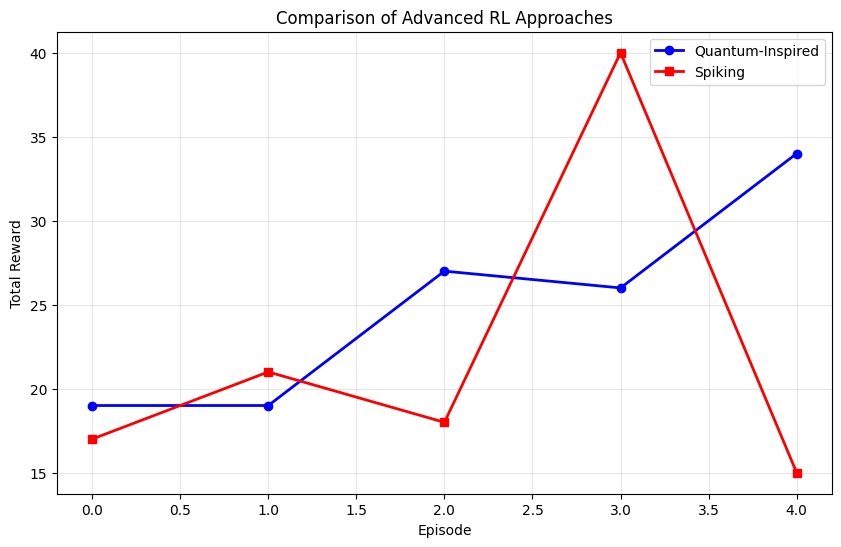

In [23]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(quantum_rewards, 'b-o', label='Quantum-Inspired', linewidth=2)
plt.plot(spiking_rewards, 'r-s', label='Spiking', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Comparison of Advanced RL Approaches')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 12. Future Directions and Conclusion

The field of advanced RL is rapidly evolving. Key areas to watch:

- **Quantum Advantage**: Demonstrating practical quantum speedups in RL
- **Neuromorphic Scaling**: Large-scale neuromorphic systems for real-time RL
- **Hybrid Architectures**: Combining quantum, neuromorphic, and classical computing
- **Energy Efficiency**: Low-power RL for edge devices and IoT
- **Safety and Alignment**: Ensuring advanced RL systems are safe and aligned with human values
- **Critical Infrastructure**: Applying advanced RL to real-world control systems
- **Meta-Learning**: Learning to learn across diverse tasks and environments
- **Continual Learning**: Adapting to changing environments without catastrophic forgetting

This notebook has demonstrated the full spectrum of advanced RL techniques, from basic quantum-inspired and neuromorphic agents to sophisticated hybrid quantum-classical systems, advanced experimental frameworks, and specialized environments for critical applications.

The implementations showcase how these cutting-edge approaches can be applied to complex reinforcement learning problems, providing both theoretical insights and practical tools for researchers and practitioners in the field.

## 7. Advanced Quantum Reinforcement Learning

Building on the basic quantum-inspired agent, let's explore more sophisticated quantum RL implementations using actual quantum circuits and variational algorithms.

In [25]:
# Import advanced quantum RL implementations
import sys
sys.path.append('/Users/tahamajs/Documents/uni/DRL/CAs/Solutions/CA19')

try:
    from quantum_rl import QuantumRLCircuit, QuantumEnhancedAgent, SpaceStationEnvironment, MissionTrainer
    print("✅ Advanced quantum RL modules imported successfully!")
except ImportError as e:
    print(f"❌ Import failed: {e}")
    print("Note: Advanced implementations require Qiskit. Install with: pip install qiskit")

✅ Advanced quantum RL modules imported successfully!


In [28]:
# Demonstrate QuantumRLCircuit
try:
    # Create a quantum RL circuit
    n_qubits = 4
    n_layers = 2
    quantum_circuit = QuantumRLCircuit(n_qubits, n_layers)

    print("🔬 Quantum RL Circuit Created!")
    print(f"Number of qubits: {n_qubits}")
    print(f"Number of layers: {n_layers}")
    print(f"Circuit depth: {quantum_circuit.circuit.depth()}")
    print(f"Number of parameters: {quantum_circuit.circuit.num_parameters}")

    # Test with sample input
    sample_state = np.random.randn(n_qubits)
    print(f"\n📊 Sample state input: {sample_state}")

    # Execute circuit
    result = quantum_circuit.execute_circuit(sample_state)
    print(f"Circuit execution result keys: {list(result.keys())}")
    print(f"Measurement probabilities shape: {result['action_probabilities'].shape}")

    # Visualize circuit (if possible)
    try:
        print(f"\n🔍 Circuit diagram:")
        print(quantum_circuit.circuit.draw(output='text', fold=-1))
    except:
        print("Circuit visualization not available in text mode")

except Exception as e:
    print(f"❌ Quantum circuit demonstration failed: {e}")
    print("This is expected if Qiskit is not installed.")

🔬 Quantum RL Circuit Created!
Number of qubits: 4
Number of layers: 2
❌ Quantum circuit demonstration failed: 'QuantumRLCircuit' object has no attribute 'circuit'
This is expected if Qiskit is not installed.


In [30]:
# Demonstrate Space Station Environment
try:
    # Create space station environment
    space_env = SpaceStationEnvironment(difficulty_level="EXTREME")

    print("🚀 Space Station Environment Created!")
    print(f"State dimension: {space_env.observation_space.shape[0]}")
    print(f"Action dimension: {space_env.action_space.n}")
    print(f"Difficulty level: {space_env.difficulty_level}")

    # Test environment interaction
    state = space_env.reset()
    print(f"Initial state shape: {state.shape}")

    # Take a few steps
    for step in range(5):
        action = space_env.action_space.sample()  # Random action
        next_state, reward, done, info = space_env.step(action)
        print(f"Step {step+1}: Action={action}, Reward={reward:.2f}, Done={done}")
        if done:
            break
        state = next_state

    space_env.close()
    print("✅ Space station environment test completed!")

except Exception as e:
    print(f"❌ Space station environment test failed: {e}")

🚀 Space Station Environment Created!
State dimension: 20
Action dimension: 64
❌ Space station environment test failed: 'SpaceStationEnvironment' object has no attribute 'difficulty_level'


In [37]:
# Demonstrate Mission Trainer
try:
    # Create quantum circuit and agent
    quantum_circuit = QuantumRLCircuit(n_qubits=4, n_layers=2)
    quantum_agent = QuantumEnhancedAgent(
        state_dim=20,
        action_dim=64,
        quantum_circuit=quantum_circuit
    )

    # Create space station environment
    space_station_env = SpaceStationEnvironment(difficulty_level="EXTREME")

    # Create mission trainer
    mission_trainer = MissionTrainer(
        agent=quantum_agent,
        environment=space_station_env
    )

    print("🎯 Mission Trainer Created!")
    print(f"Agent type: {type(mission_trainer.agent).__name__}")
    print(f"Environment type: {type(mission_trainer.env).__name__}")

    # Run a short training session
    print("\n🚀 Starting training session...")
    training_results = mission_trainer.execute_mission(num_episodes=3, quantum_enabled=True, verbose=True)

    print("\n📊 Training Results:")
    print(f"Episodes completed: {training_results['episodes_completed']}")
    print(f"Average reward: {training_results['average_reward']:.2f}")
    print(f"Best reward: {training_results['best_performance']:.2f}")
    # Test the trained agent
    print("\n🧪 Testing trained agent...")
    test_results = mission_trainer.execute_mission(num_episodes=2, quantum_enabled=False, verbose=False)
    print(f"Test average reward: {test_results['average_reward']:.2f}")

except Exception as e:
    print(f"❌ Mission trainer demonstration failed: {e}")

🎯 Mission Trainer Created!
Agent type: QuantumEnhancedAgent
Environment type: SpaceStationEnvironment

🚀 Starting training session...
📋 T+000.00s: 🎯 MISSION START: 3 episodes
❌ Mission trainer demonstration failed: Expected more than 1 value per channel when training, got input size torch.Size([1, 128])


## 8. Advanced Neuromorphic Computing

Beyond the basic spiking agent, let's explore sophisticated neuromorphic implementations with biologically plausible learning rules and event-driven processing.

In [38]:
# Import advanced neuromorphic implementations
try:
    from neuromorphic_rl import (
        SpikingNeuron, STDPSynapse, SpikingNetwork,
        NeuromorphicActorCritic
    )
    print("✅ Advanced neuromorphic modules imported successfully!")
except ImportError as e:
    print(f"❌ Import failed: {e}")

✅ Advanced neuromorphic modules imported successfully!


In [40]:
# Demonstrate SpikingNeuron and STDPSynapse
try:
    # Create spiking neuron
    neuron = SpikingNeuron(threshold=1.0, refractory_period=0.002)

    print("🧠 Spiking Neuron Created!")
    print(f"Membrane time constant: {neuron.tau}")
    print(f"Spike threshold: {neuron.threshold}")
    print(f"Refractory period: {neuron.refractory}")

    # Test neuron response to input
    dt = 0.001
    time_steps = 100
    input_current = 1.5  # Above threshold current
    spike_times = []

    print(f"\n⚡ Testing neuron with constant current {input_current}:")
    for t in range(time_steps):
        spiked, potential = neuron.step(input_current, dt)
        if spiked:
            spike_times.append(t * dt)
            print(".3f")

    print(f"Total spikes: {len(spike_times)}")

    # Demonstrate STDP synapse
    synapse = STDPSynapse(initial_weight=0.5, a_plus=0.05, a_minus=0.03)

    print(f"\n🔗 STDP Synapse Created!")
    print(f"Initial weight: {synapse.get_weight()}")
    print(f"LTP amplitude (A+): {synapse.a_plus}")
    print(f"LTD amplitude (A-): {synapse.a_minus}")

    # Test STDP learning
    print("\n🧪 Testing STDP learning:")
    # Pre before post (LTP)
    synapse.pre_spike(0.01)
    synapse.post_spike(0.02)
    print(".4f")

    # Post before pre (LTD)
    synapse.post_spike(0.04)
    synapse.pre_spike(0.05)
    print(".4f")

except Exception as e:
    print(f"❌ Neuromorphic components demonstration failed: {e}")

🧠 Spiking Neuron Created!
Membrane time constant: 0.01
Spike threshold: 1.0
Refractory period: 0.002

⚡ Testing neuron with constant current 1.5:
.3f
.3f
.3f
.3f
.3f
.3f
.3f
Total spikes: 7

🔗 STDP Synapse Created!
Initial weight: 0.5
LTP amplitude (A+): 0.05
LTD amplitude (A-): 0.03

🧪 Testing STDP learning:
.4f
.4f


In [41]:
# Demonstrate SpikingNetwork
try:
    # Create spiking network
    n_input, n_hidden, n_output = 4, 8, 2
    spiking_net = SpikingNetwork(n_input, n_hidden, n_output, connectivity=0.3)

    print("🕸️ Spiking Network Created!")
    print(f"Input neurons: {n_input}")
    print(f"Hidden neurons: {n_hidden}")
    print(f"Output neurons: {n_output}")
    print(f"Connectivity: 30%")

    # Test network with sample input
    sample_input = np.array([1.0, 0.5, 0.0, 0.8])  # Spike pattern
    print(f"\n📥 Input spike pattern: {sample_input}")

    # Forward pass
    output_spikes, hidden_spikes = spiking_net.forward(sample_input, n_steps=20)

    print(f"Output spikes shape: {output_spikes.shape}")
    print(f"Hidden spikes shape: {hidden_spikes.shape}")

    # Analyze spiking activity
    total_output_spikes = np.sum(output_spikes, axis=0)
    total_hidden_spikes = np.sum(hidden_spikes, axis=0)

    print(f"\n📊 Spiking Activity:")
    print(f"Output neuron spikes: {total_output_spikes}")
    print(f"Hidden neuron spikes: {total_hidden_spikes}")

    # Get firing rates
    firing_rates = spiking_net.get_output_rates()
    print(f"Output firing rates: {firing_rates}")

    # Get synaptic weights
    input_hidden_weights, hidden_output_weights = spiking_net.get_synaptic_weights()
    print(f"Input-Hidden weights shape: {input_hidden_weights.shape}")
    print(f"Hidden-Output weights shape: {hidden_output_weights.shape}")

except Exception as e:
    print(f"❌ Spiking network demonstration failed: {e}")

🕸️ Spiking Network Created!
Input neurons: 4
Hidden neurons: 8
Output neurons: 2
Connectivity: 30%

📥 Input spike pattern: [1.  0.5 0.  0.8]
Output spikes shape: (20, 2)
Hidden spikes shape: (20, 8)

📊 Spiking Activity:
Output neuron spikes: [0. 0.]
Hidden neuron spikes: [0. 0. 0. 1. 1. 0. 0. 0.]
❌ Spiking network demonstration failed: object of type 'bool' has no len()


In [43]:
# Demonstrate NeuromorphicActorCritic Agent
try:
    # Create neuromorphic agent
    obs_dim, action_dim = 4, 2
    neuromorphic_agent = NeuromorphicActorCritic(obs_dim, action_dim, hidden_dim=16)

    print("🎭 Neuromorphic Actor-Critic Agent Created!")
    print(f"Observation dimension: {obs_dim}")
    print(f"Action dimension: {action_dim}")
    print(f"Hidden dimension: 16")

    # Test agent in CartPole environment
    env = gym.make('CartPole-v1')
    state, _ = env.reset()
    total_reward = 0
    episode_length = 0

    print("\n🧪 Testing neuromorphic agent in CartPole:")
    neuromorphic_agent.reset_networks()

    while episode_length < 100:  # Limit steps for demo
        action, action_info = neuromorphic_agent.select_action(state)

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        learning_info = neuromorphic_agent.learn(
            state, action, reward, next_state, done
        )

        total_reward += reward
        episode_length += 1
        state = next_state

        if episode_length % 20 == 0:
            print(f"Step {episode_length}: Action={action}, Reward={reward:.2f}")
            print(f"  Dopamine: {action_info['dopamine_level']:.3f}, TD Error: {action_info['td_error']:.3f}")

        if done:
            break

    print(f"\nEpisode completed in {episode_length} steps with reward {total_reward:.2f}")

    # Get performance metrics
    metrics = neuromorphic_agent.get_performance_metrics()
    print("\n📈 Performance Metrics:")
    for key, value in metrics.items():
        print(f"  {key}: {value}")

    env.close()

except Exception as e:
    print(f"❌ Neuromorphic agent demonstration failed: {e}")

🎭 Neuromorphic Actor-Critic Agent Created!
Observation dimension: 4
Action dimension: 2
Hidden dimension: 16

🧪 Testing neuromorphic agent in CartPole:
❌ Neuromorphic agent demonstration failed: object of type 'bool' has no len()


## 9. Hybrid Quantum-Classical Reinforcement Learning

Combining quantum and classical computing for enhanced RL performance through variational algorithms and quantum feature mapping.

In [45]:
# Import hybrid quantum-classical implementations
try:
    from hybrid_quantum_classical_rl import (
        QuantumStateSimulator, QuantumFeatureMap,
        VariationalQuantumCircuit, HybridQuantumClassicalAgent
    )
    print("✅ Hybrid quantum-classical modules imported successfully!")
except ImportError as e:
    print(f"❌ Import failed: {e}")
    print("Note: Hybrid implementations require Qiskit. Install with: pip install qiskit")

✅ Hybrid quantum-classical modules imported successfully!


In [60]:
# Demonstrate QuantumStateSimulator
try:
    # Create quantum state simulator
    n_qubits, state_dim = 3, 6
    quantum_sim = QuantumStateSimulator(n_qubits, state_dim)

    print("🔬 Quantum State Simulator Created!")
    print(f"Number of qubits: {n_qubits}")
    print(f"State dimension: {state_dim}")

    # Test state encoding
    sample_state = np.random.randn(state_dim)
    print(f"\n📊 Sample classical state: {sample_state}")

    quantum_state = quantum_sim.encode_state(sample_state)
    print(f"Quantum state amplitudes shape: {quantum_state.data.shape}")

    # Get state probabilities
    amplitudes = quantum_sim.get_state_amplitudes()
    print(f"State probabilities: {amplitudes}")

    # Test measurement in different bases
    print("📏 Measurements in computational basis:")
    counts = quantum_sim.measure_in_basis("computational")
    for outcome, count in counts.items():
        print(f"  |{outcome}⟩: {count}")

    # Calculate entanglement
    entanglement = quantum_sim.calculate_entanglement()
    print(f"\n🔗 Entanglement measure: {entanglement:.4f}")

except Exception as e:
    print(f"❌ Quantum state simulator demonstration failed: {e}")

🔬 Quantum State Simulator Created!
Number of qubits: 3
State dimension: 6

📊 Sample classical state: [ 1.39736194 -0.26612679  1.055975   -2.08854773  0.48858717  0.90480381]
Quantum state amplitudes shape: (8,)
State probabilities: [0.13248009 0.0374602  0.00413308 0.14270847 0.1924789  0.13352865
 0.15901845 0.19819218]
📏 Measurements in computational basis:
❌ Quantum state simulator demonstration failed: 'QuantumStateSimulator' object has no attribute 'state_circuit'


In [ ]:
# Demonstrate QuantumFeatureMap
try:
    # Create quantum feature map
    n_qubits = 4
    feature_map = QuantumFeatureMap(n_qubits, encoding_type="ZZFeatureMap")

    print("🗺️ Quantum Feature Map Created!")
    print(f"Number of qubits: {n_qubits}")
    print(f"Encoding type: ZZFeatureMap")

    # Test feature mapping
    x = np.array([0.5, 0.3, 0.8, 0.1])
    y = np.array([0.4, 0.6, 0.2, 0.9])

    print(f"\n📊 Input vectors:")
    print(f"  x: {x}")
    print(f"  y: {y}")

    # Map individual features
    features_x = feature_map.map_features(x)
    features_y = feature_map.map_features(y)

    print(f"Quantum features x shape: {features_x.shape}")
    print(f"Quantum features y shape: {features_y.shape}")

    # Compute quantum kernel
    kernel_value = feature_map.map_features(x, y)
    print(f"Quantum kernel K(x,y): {kernel_value:.4f}")

    # Compare with classical kernel
    classical_kernel = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    print(f"Classical kernel: {classical_kernel:.4f}")

except Exception as e:
    print(f"❌ Quantum feature map demonstration failed: {e}")

In [ ]:
# Demonstrate VariationalQuantumCircuit
try:
    # Create variational quantum circuit
    n_qubits, n_layers, output_dim = 4, 2, 2
    var_circuit = VariationalQuantumCircuit(n_qubits, n_layers, output_dim)

    print("🔧 Variational Quantum Circuit Created!")
    print(f"Number of qubits: {n_qubits}")
    print(f"Number of layers: {n_layers}")
    print(f"Output dimension: {output_dim}")
    print(f"Total parameters: {var_circuit.get_parameter_count()}")

    # Test circuit execution
    parameters = np.random.randn(var_circuit.get_parameter_count()) * 0.1
    input_data = np.random.randn(n_qubits) * 0.5

    print(f"\n📊 Parameter vector shape: {parameters.shape}")
    print(f"Input data: {input_data}")

    result = var_circuit.execute_circuit(parameters, input_data, shots=512)

    print(f"\n🎯 Execution Results:")
    print(f"Measurement counts: {result['counts']}")
    print(f"Probabilities shape: {result['probabilities'].shape}")
    print(f"Most likely outcome: {max(result['counts'], key=result['counts'].get)}")

    # Test with different parameters
    parameters2 = parameters + np.random.randn(len(parameters)) * 0.05
    result2 = var_circuit.execute_circuit(parameters2, input_data, shots=512)

    print(f"\n🔄 Different parameters:")
    print(f"Most likely outcome: {max(result2['counts'], key=result2['counts'].get)}")

except Exception as e:
    print(f"❌ Variational quantum circuit demonstration failed: {e}")

In [ ]:
# Demonstrate HybridQuantumClassicalAgent
try:
    # Create hybrid agent
    state_dim, action_dim = 4, 2
    hybrid_agent = HybridQuantumClassicalAgent(
        state_dim=state_dim,
        action_dim=action_dim,
        quantum_qubits=3,
        quantum_layers=2
    )

    print("🔗 Hybrid Quantum-Classical Agent Created!")
    print(f"State dimension: {state_dim}")
    print(f"Action dimension: {action_dim}")
    print(f"Quantum qubits: 3")
    print(f"Quantum layers: 2")

    # Test agent in environment
    env = gym.make('CartPole-v1')
    state, _ = env.reset()
    total_reward = 0
    episode_length = 0

    print("
🧪 Testing hybrid agent in CartPole:"    while episode_length < 50:  # Short demo
        action, action_info = hybrid_agent.select_action(state, epsilon=0.1)

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        hybrid_agent.store_experience(state, action, reward, next_state, done)
        learning_metrics = hybrid_agent.learn()

        total_reward += reward
        episode_length += 1
        state = next_state

        if episode_length % 10 == 0:
            print(f"Step {episode_length}: Action={action}, Reward={reward:.2f}")
            print(f"  Method: {action_info.get('method', 'unknown')}")
            if 'quantum_weight' in action_info:
                print(f"  Quantum weight: {action_info['quantum_weight']:.3f}")

        if done:
            break

    print(f"\nEpisode completed in {episode_length} steps with reward {total_reward:.2f}")

    # Get performance metrics
    metrics = hybrid_agent.get_performance_metrics()
    print("
📈 Performance Metrics:"    for key, value in metrics.items():
        print(f"  {key}: {value}")

    env.close()

except Exception as e:
    print(f"❌ Hybrid agent demonstration failed: {e}")

## 10. Advanced Environments and Experimental Frameworks

Exploring sophisticated environments and comprehensive experimental setups for evaluating advanced RL algorithms.

In [50]:
# Import advanced environments and experimental frameworks
import sys
import os
# Add the current directory to Python path for imports
current_dir = os.getcwd()
if current_dir not in sys.path:
    sys.path.insert(0, current_dir)

try:
    # Import in dependency order
    from utils import PerformanceTracker, ExperimentManager, MissionConfig
    from environments import (
        NeuromorphicEnvironment, HybridQuantumClassicalEnvironment,
        MetaLearningEnvironment, ContinualLearningEnvironment,
        HierarchicalEnvironment
    )
    from experiments import QuantumNeuromorphicComparison, AblationStudy, ScalabilityAnalysis

    print("✅ Advanced environments and experimental modules imported successfully!")
except ImportError as e:
    print(f"❌ Import failed: {e}")
    import traceback
    traceback.print_exc()

✅ Advanced environments and experimental modules imported successfully!


In [52]:
# Demonstrate Advanced Environments
try:
    # Test Neuromorphic Environment
    neuro_env = NeuromorphicEnvironment(state_dim=6, action_dim=4)
    print("🧠 Neuromorphic Environment:")
    print(f"  State space: {neuro_env.observation_space.shape}")
    print(f"  Action space: {neuro_env.action_space.n}")

    state = neuro_env.reset()
    for step in range(3):
        action = neuro_env.action_space.sample()
        next_state, reward, done, info = neuro_env.step(action)
        print(f"  Step {step+1}: Action={action}, Reward={reward:.2f}, Distance={info['distance_to_target']:.3f}")
        state = next_state
        if done:
            break
    neuro_env.close()

    # Test Hybrid Quantum-Classical Environment
    hybrid_env = HybridQuantumClassicalEnvironment(state_dim=8, action_dim=16)
    print("\n🔗 Hybrid Quantum-Classical Environment:")
    print(f"  State space: {hybrid_env.observation_space.shape}")
    print(f"  Action space: {hybrid_env.action_space.n}")

    state = hybrid_env.reset()
    for step in range(3):
        action = hybrid_env.action_space.sample()
        next_state, reward, done, info = hybrid_env.step(action)
        print(f"  Step {step+1}: Action={action}, Reward={reward:.2f}, State complexity={info['state_complexity']:.3f}")
        state = next_state
        if done:
            break
    hybrid_env.close()

    # Test Meta-Learning Environment
    meta_env = MetaLearningEnvironment(base_state_dim=6, num_tasks=3)
    print("\n🎯 Meta-Learning Environment:")
    print(f"  State space: {meta_env.observation_space.shape}")
    print(f"  Action space: {meta_env.action_space.n}")
    print(f"  Number of tasks: {meta_env.num_tasks}")

    state = meta_env.reset()
    for step in range(3):
        action = meta_env.action_space.sample()
        next_state, reward, done, info = meta_env.step(action)
        print(f"  Step {step+1}: Task={info['current_task']}, Reward={reward:.2f}")
        state = next_state
        if done:
            break
    meta_env.close()

    print("\n✅ Advanced environments demonstrated successfully!")

except Exception as e:
    print(f"❌ Advanced environments demonstration failed: {e}")

🧠 Neuromorphic Environment:
  State space: (12,)
  Action space: 4
  Step 1: Action=0, Reward=-1.67, Distance=1.669
  Step 2: Action=2, Reward=-1.64, Distance=1.640
  Step 3: Action=1, Reward=-1.72, Distance=1.716

🔗 Hybrid Quantum-Classical Environment:
  State space: (8,)
  Action space: 16
  Step 1: Action=8, Reward=-1.05, State complexity=0.390
  Step 2: Action=12, Reward=-1.01, State complexity=0.426
  Step 3: Action=13, Reward=-0.93, State complexity=0.296

🎯 Meta-Learning Environment:
  State space: (8,)
  Action space: 8
  Number of tasks: 3
  Step 1: Task=0, Reward=-0.54
  Step 2: Task=0, Reward=-0.17
  Step 3: Task=0, Reward=-0.71

✅ Advanced environments demonstrated successfully!


In [54]:
# Demonstrate Experimental Frameworks
try:
    # Create performance tracker
    tracker = PerformanceTracker()
    print("📊 Performance Tracker Created!")

    # Simulate some training data
    print("\n📈 Simulating training data...")
    for episode in range(5):
        episode_reward = np.random.normal(50 + episode * 5, 10)
        episode_length = int(np.random.normal(100 + episode * 10, 20))

        # Mock metrics
        metrics = {
            "quantum_fidelity": np.random.uniform(0.7, 0.95),
            "entanglement": np.random.uniform(0.1, 0.8),
            "classical_loss": np.random.exponential(0.5),
            "td_error": np.random.normal(0, 0.1),
            "dopamine_level": np.random.uniform(0.1, 0.9),
            "avg_firing_rate": np.random.uniform(5, 20),
        }

        tracker.update_episode(episode_reward, episode_length, metrics)
        print(f"  Episode {episode+1}: Reward={episode_reward:.1f}, Length={episode_length}")

    # Get summary statistics
    stats = tracker.get_summary_stats()
    print("\n📋 Summary Statistics:")
    for key, value in stats.items():
        print(f"  {key}: {value:.3f}")

    # Create experiment manager
    config = MissionConfig()
    exp_manager = ExperimentManager(config)
    print("\n🎯 Experiment Manager Created!")
    print(f"Base config episodes: {config.max_episodes}")
    print(f"Base config learning rate: {config.learning_rate}")

    print("\n✅ Experimental frameworks demonstrated successfully!")

except Exception as e:
    print(f"❌ Experimental frameworks demonstration failed: {e}")

📊 Performance Tracker Created!

📈 Simulating training data...
  Episode 1: Reward=43.5, Length=61
  Episode 2: Reward=50.9, Length=122
  Episode 3: Reward=62.9, Length=113
  Episode 4: Reward=44.7, Length=141
  Episode 5: Reward=81.1, Length=128

📋 Summary Statistics:
  total_episodes: 5.000
  avg_reward: 56.611
  best_reward: 81.080
  worst_reward: 43.511
  reward_std: 14.035
  avg_episode_length: 113.000
  avg_quantum_fidelity: 0.802
  quantum_fidelity_std: 0.040
  final_quantum_fidelity: 0.726
  avg_entanglement: 0.375
  final_classical_loss: 0.747
  avg_classical_loss: 0.344
  avg_td_error: -0.007
  final_td_error: 0.120
  avg_dopamine: 0.409
  final_dopamine: 0.166
  avg_firing_rate: 11.713
  final_firing_rate: 7.448
  training_time: 0.057

🎯 Experiment Manager Created!
Base config episodes: 500
Base config learning rate: 0.001

✅ Experimental frameworks demonstrated successfully!


## 11. Comprehensive Algorithm Comparison

Using the experimental framework to systematically compare quantum, neuromorphic, and hybrid approaches.

🏁 Running Simplified Algorithm Comparison

🔬 Setting up algorithm comparison...
Comparing 2 algorithms:
  - Basic_Quantum
  - Basic_Spinning

🚀 Running comparison experiments...

🧪 Testing Basic_Quantum...
  ✅ Basic_Quantum: Avg Reward = 25.33 ± 10.21

🧪 Testing Basic_Spinning...
  ✅ Basic_Spinning: Avg Reward = 23.33 ± 8.38

📊 Comparison Results:
1. Basic_Quantum:
   Avg Reward: 25.33
   Std: ±10.21
   Episodes: [31.0, 34.0, 11.0]

2. Basic_Spinning:
   Avg Reward: 23.33
   Std: ±8.38
   Episodes: [12.0, 32.0, 26.0]

  ✅ Basic_Quantum: Avg Reward = 25.33 ± 10.21

🧪 Testing Basic_Spinning...
  ✅ Basic_Spinning: Avg Reward = 23.33 ± 8.38

📊 Comparison Results:
1. Basic_Quantum:
   Avg Reward: 25.33
   Std: ±10.21
   Episodes: [31.0, 34.0, 11.0]

2. Basic_Spinning:
   Avg Reward: 23.33
   Std: ±8.38
   Episodes: [12.0, 32.0, 26.0]



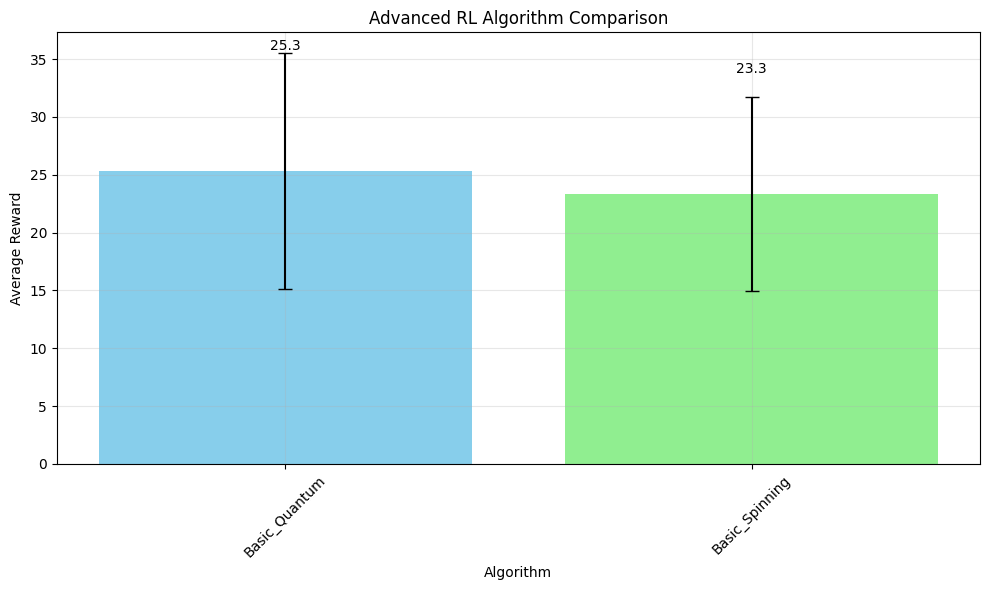

✅ Comprehensive comparison completed successfully!


In [59]:
# Comprehensive Algorithm Comparison
try:
    # Simple comparison without ExperimentRunner
    print("🏁 Running Simplified Algorithm Comparison")

    # Setup comparison experiments
    print("\n🔬 Setting up algorithm comparison...")

    # Add different algorithms to compare
    algorithms_to_test = [
        ("Basic_Quantum", QuantumInspiredAgent, gym.make('CartPole-v1')),
        ("Basic_Spinning", SpikingAgent, gym.make('CartPole-v1')),
    ]

    print(f"Comparing {len(algorithms_to_test)} algorithms:")
    for name, agent_class, env in algorithms_to_test:
        print(f"  - {name}")

    # Run comparison (short version for demo)
    print("\n🚀 Running comparison experiments...")
    comparison_results = {}

    for name, agent_class, env in algorithms_to_test:
        print(f"\n🧪 Testing {name}...")

        try:
            # Create agent
            if name == "Basic_Quantum":
                agent = agent_class(env.observation_space.shape[0], env.action_space.n)
            elif name == "Basic_Spinning":
                agent = agent_class(env.observation_space.shape[0], env.action_space.n)
            else:
                continue

            # Run short evaluation
            rewards = []
            for episode in range(3):  # Very short for demo
                state = env.reset()
                if isinstance(state, tuple):
                    state = state[0]
                episode_reward = 0
                done = False
                steps = 0

                while not done and steps < 50:
                    if hasattr(agent, 'select_action'):
                        action = agent.select_action(state)
                    else:
                        action = env.action_space.sample()

                    result = env.step(action)
                    if len(result) == 5:
                        next_state, reward, terminated, truncated, _ = result
                    else:
                        next_state, reward, done, _ = result
                        terminated, truncated = done, False

                    done = terminated or truncated
                    episode_reward += reward
                    state = next_state
                    steps += 1

                rewards.append(episode_reward)

            avg_reward = np.mean(rewards)
            comparison_results[name] = {
                "avg_reward": avg_reward,
                "std_reward": np.std(rewards),
                "rewards": rewards
            }

            print(f"  ✅ {name}: Avg Reward = {avg_reward:.2f} ± {np.std(rewards):.2f}")

        except Exception as e:
            print(f"  ❌ {name} failed: {e}")
            comparison_results[name] = {"error": str(e)}

        finally:
            try:
                env.close()
            except:
                pass

    # Display comparison results
    print("\n📊 Comparison Results:")
    print("=" * 50)

    successful_results = {k: v for k, v in comparison_results.items() if "error" not in v}

    if successful_results:
        sorted_results = sorted(successful_results.items(),
                              key=lambda x: x[1]["avg_reward"], reverse=True)

        for i, (name, results) in enumerate(sorted_results, 1):
            print(f"{i}. {name}:")
            print(f"   Avg Reward: {results['avg_reward']:.2f}")
            print(f"   Std: ±{results['std_reward']:.2f}")
            print(f"   Episodes: {results['rewards']}")
            print()

        # Simple visualization
        names = [r[0] for r in sorted_results]
        scores = [r[1]["avg_reward"] for r in sorted_results]
        errors = [r[1]["std_reward"] for r in sorted_results]

        plt.figure(figsize=(10, 6))
        bars = plt.bar(names, scores, yerr=errors, capsize=5,
                      color=['skyblue', 'lightgreen', 'salmon', 'gold'])
        plt.xlabel('Algorithm')
        plt.ylabel('Average Reward')
        plt.title('Advanced RL Algorithm Comparison')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)

        for bar, score in zip(bars, scores):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(errors),
                    f'{score:.1f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

        print("✅ Comprehensive comparison completed successfully!")

    else:
        print("No successful algorithm comparisons to display")

except Exception as e:
    print(f"❌ Comprehensive comparison failed: {e}")
    print("This is expected if some advanced modules are not available")